In [1]:
"""This is a notebook to train XGBoost on forest prediction dataset"""

'This is a notebook to train XGBoost on forest prediction dataset'

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('../datasets/forest.csv')

In [4]:
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [5]:
data.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [6]:
import numpy as np

In [ ]:
wilderness_cols = [c for c in data.columns if c.startswith("Wilderness_Area")]
data["Wilderness_Area"] = np.argmax(data[wilderness_cols].values, axis=1) + 1
data = data.drop(columns=wilderness_cols)

In [8]:
soil_cols = [c for c in data.columns if c.startswith("Soil_Type")]
data["Soil_Type"] = np.argmax(data[soil_cols].values, axis=1) + 1
data = data.drop(columns=soil_cols)

In [9]:
data = data.drop(columns=["Id"])

print(data.head())
print("\nColumns:", data.columns.tolist())


   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

In [10]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness_Area,Soil_Type
0,2596,51,3,258,0,510,221,232,148,6279,5,1,29
1,2590,56,2,212,-6,390,220,235,151,6225,5,1,29
2,2804,139,9,268,65,3180,234,238,135,6121,2,1,12
3,2785,155,18,242,118,3090,238,238,122,6211,2,1,30
4,2595,45,2,153,-1,391,220,234,150,6172,5,1,29


In [11]:
data = data.dropna()

In [12]:
print(data.shape)

(15120, 13)


In [18]:
X = data.drop(columns=["Cover_Type"])
y = data["Cover_Type"]
y = y-1

print(X.shape, y.shape)
print("Unique target values:", sorted(y.unique()))


(15120, 12) (15120,)
Unique target values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=300,        # More trees than RF default
    max_depth=6,             # Controlled depth to prevent overfitting
    learning_rate=0.1,       # Standard learning rate
    subsample=0.8,           # Row sampling to prevent overfitting
    colsample_bytree=0.8,    # Column sampling
    random_state=42,
    n_jobs=-1,               # Use all CPU cores
    eval_metric='mlogloss',  # For multiclass classification
    early_stopping_rounds=50 # Stop if no improvement for 50 rounds
)

In [21]:
eval_set = [(X_train, y_train), (X_test, y_test)]

In [22]:
xgb_model.fit(
    X_train, y_train,
    eval_set=eval_set,
    verbose=True  # Set to True to see training progress
)

[0]	validation_0-mlogloss:1.76092	validation_1-mlogloss:1.76792
[1]	validation_0-mlogloss:1.62381	validation_1-mlogloss:1.63704
[2]	validation_0-mlogloss:1.50334	validation_1-mlogloss:1.52199
[3]	validation_0-mlogloss:1.41343	validation_1-mlogloss:1.43636
[4]	validation_0-mlogloss:1.33067	validation_1-mlogloss:1.35656
[5]	validation_0-mlogloss:1.24952	validation_1-mlogloss:1.28000
[6]	validation_0-mlogloss:1.18267	validation_1-mlogloss:1.21624
[7]	validation_0-mlogloss:1.12042	validation_1-mlogloss:1.15753
[8]	validation_0-mlogloss:1.07156	validation_1-mlogloss:1.11129
[9]	validation_0-mlogloss:1.02338	validation_1-mlogloss:1.06651
[10]	validation_0-mlogloss:0.97780	validation_1-mlogloss:1.02399
[11]	validation_0-mlogloss:0.93795	validation_1-mlogloss:0.98773
[12]	validation_0-mlogloss:0.89886	validation_1-mlogloss:0.95140
[13]	validation_0-mlogloss:0.86215	validation_1-mlogloss:0.91854
[14]	validation_0-mlogloss:0.83161	validation_1-mlogloss:0.89088
[15]	validation_0-mlogloss:0.80525	

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,50
,enable_categorical,False
,eval_metric,'mlogloss'


In [23]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

XGBoost Accuracy: 0.855489417989418

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       432
           1       0.76      0.64      0.70       432
           2       0.84      0.81      0.83       432
           3       0.95      0.98      0.97       432
           4       0.87      0.95      0.91       432
           5       0.83      0.88      0.85       432
           6       0.94      0.97      0.96       432

    accuracy                           0.86      3024
   macro avg       0.85      0.86      0.85      3024
weighted avg       0.85      0.86      0.85      3024



In [24]:
import matplotlib.pyplot as plt
import numpy as np

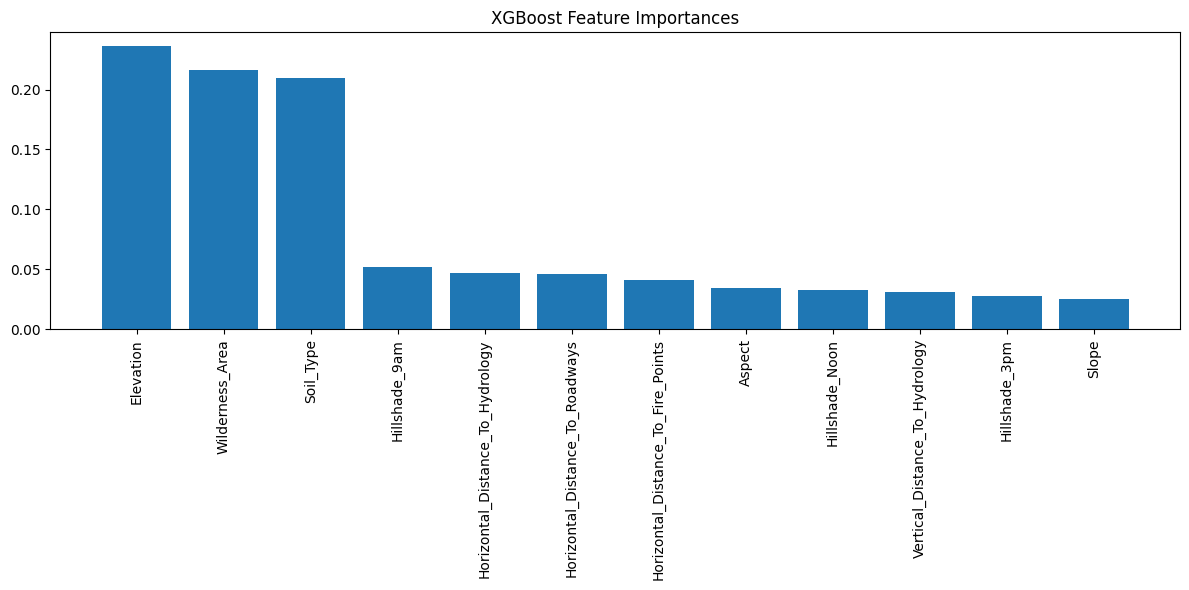

In [25]:
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Take top k features
k = min(20, len(importances))

plt.figure(figsize=(12,6))
plt.title("XGBoost Feature Importances")
plt.bar(range(k), importances[indices[:k]], align="center")
plt.xticks(range(k), X.columns[indices[:k]], rotation=90)
plt.tight_layout()
plt.show()

In [26]:
sample = X_test.head()

# Predict on them
predictions = xgb_model.predict(sample)

print("XGBoost Predictions:", predictions.tolist())
print("Actual:", y_test.head().tolist())

XGBoost Predictions: [3, 5, 3, 4, 3]
Actual: [3, 5, 3, 4, 3]


In [27]:
import joblib

# Save trained XGBoost model
joblib.dump(xgb_model, "xgboost_forest_model.pkl")
print("✅ XGBoost model saved as xgboost_forest_model.pkl")

# Optional: Print training history
print(f"\nBest iteration: {xgb_model.best_iteration}")
print(f"Best score: {xgb_model.best_score:.4f}")

✅ XGBoost model saved as xgboost_forest_model.pkl

Best iteration: 298
Best score: 0.3884
